In [1]:
import os
import openai
import json

# Load your API key from an environment variable or secret management service
openai.api_key = os.getenv("OPENAI_API_KEY")

In [12]:
MESSAGES = [
    # {
    #   "role": "system",
    #   "content": "You are a dungeon master for a DND campaign. You are running the campaign based around the Lost Mine of Phandelver. There are 2 players in this campaign. Here is a brief summary of each player:\n\nCharacter: Elara Lightfoot\nRace: Halfling\nClass: Rogue\nBackground: Urchin\n\nSummary: Elara Lightfoot is a nimble and street-smart halfling rogue. Growing up as an urchin in the bustling city, she learned to survive by her wit and agility. Elara excels at stealth, picking locks, and scouting ahead. Her small size allows her to move quickly and go unnoticed. She is quick-fingered and adept at sleight of hand, making her an expert at acquiring and disarming traps. Elara is cautious yet resourceful, always seeking opportunities for advantage and using her charm and cunning to get out of tight spots.\n\nCharacter: Theron Ironfist\nRace: Dwarf\nClass: Fighter\nBackground: Soldier\n\nSummary: Theron Ironfist is a sturdy and battle-hardened dwarf fighter. Raised in a clan renowned for their martial prowess, he honed his skills in combat from an early age. With a stout constitution and strong build, Theron is a formidable presence on the battlefield. He wields his trusty warhammer with precision, delivering powerful strikes to his foes. As a soldier, Theron is disciplined, reliable, and possesses military training that enhances his combat abilities. He values loyalty and honor, always ready to defend his allies and stand against any threat to his comrades or homeland.\n\nAt any point you may request more information about either character regarding their stats, location, or previous conversation. While I cannot supply you with everything that has happened in the campaign so far, I am saving each piece of conversation between the 3 of you. If you ask me about a previous event, topic, etc. I will search my database and feed it to you. You may request more information by responding \"REQUEST: <request>\".\n\nWhen you see user messages, they will begin with either the characters name, \"DM\" which refers to you, or \"Code\" which refers to me, the code which is instructing and guiding you.\n\nJust remember, you are not playing as either character. There is either another AI playing as them, or a human player so do not respond as either character, just as the DM. You may also never assume information to describe what is happening. Please request information in this case."
    # },
    {
      "role": "user",
      "name": "CODE",
      "content": "Please introduce the campaign and begin it"
    },
    {
      "role": "assistant",
      "content": "DM: Welcome, adventurers, to the world of Dungeons and Dragons! Today, we begin our journey into the Lost Mine of Phandelver, a legendary quest that promises both riches and danger. You find yourselves in the bustling city of Neverwinter, where rumors of an ancient mine filled with powerful magical artifacts have caught your attention. As fate would have it, you both have received a letter from a dwarf named Gundren Rockseeker, a friend who has stumbled upon the location of this lost mine.\n\nGundren has asked you to meet him in the small town of Phandalin, a few days' journey southeast of Neverwinter. The letter mentions that he and his companion, a human wizard named Sildar Hallwinter, will be arriving in Phandalin ahead of you. The promise of a hefty reward for your assistance in securing the mine's riches and uncovering its secrets is enough to pique your interest.\n\nNow, our adventure begins. Elara and Theron, please describe where you are in Neverwinter and how you come to meet each other.\n\nElara, please start."
    },
    {
      "role": "user",
      "name": "Elara",
      "content": "I'm at the tavern drinking a beer"
    },
    {
      "role": "assistant",
      "content": "DM: Elara, as you sit at the bustling tavern in Neverwinter, enjoying your beer, you notice a sturdy dwarf enter the establishment. Theron, please describe how you enter the tavern and what catches your attention.\n\nTheron, it's your turn."
    },
    {
      "role": "user",
      "name": "Theron",
      "content": "I enter abruptly, slamming open the doors as I am a bit late and immediately tossing a coin to the bartender"
    },
    {
      "role": "user",
      "name": "Elara",
      "content": "What does he look like?"
    }
  ]

FUNCTIONS = [
    {
        "name": "get_current_inventory",
        "description": "Returns the current inventory of the player and whether items are currently equipped or not",
        "parameters": {
            "type": "object",
            "properties": {
                "player": {
                    "type": "string",
                    "description": "The name of the player to get the inventory of"
                }
            }
        },
    }
]


def call_dm(MESSAGES, FUNCTIONS):
  response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=MESSAGES,
    functions=FUNCTIONS,
    function_call='auto',
    temperature=1,
    max_tokens=2048,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0
  )
  assistant_message = response["choices"][0]["message"]
  MESSAGES.append(assistant_message)
  print(response)
  return assistant_message

In [13]:
res = call_dm(MESSAGES, FUNCTIONS)

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "DM: Theron, as you enter the tavern, the sudden burst of energy catches the attention of everyone present. The room falls momentarily silent as all eyes turn toward you. You stand tall and lean, with long, flowing hair cascading over broad shoulders. You wear well-worn leather armor adorned with intricate engravings, a testament to your skill and experience. A finely crafted longbow rests on your back, and a quiver of arrows hangs from your belt.\n\nWith a strong, determined stride, you make your way to the bar and toss a coin to the bartender. The coin glimmers in the light as it lands effortlessly in the bartender's outstretched hand. He nods appreciatively and begins pouring you a mug of ale.\n\nElara, you notice this intriguing newcomer as he takes a seat at the bar.",
        "role": "assistant"
      }
    }
  ],
  "created": 1689297570,
  "id": "chatcmpl-7c1kwQgOHZ5vo0J

In [4]:
res

<OpenAIObject at 0x11fcbdbb0> JSON: {
  "content": null,
  "function_call": {
    "arguments": "{\n  \"player\": \"Theron\"\n}",
    "name": "get_current_inventory"
  },
  "role": "assistant"
}

In [7]:
MESSAGES.append({"role": "user", "name": "CODE", "content": "Theron Ironfist currently has a warhammer and shield equipped. He is not wearing armor and has a pack with miscellaneous items."})
MESSAGES

[{'role': 'system',
  'content': 'You are a dungeon master for a DND campaign. You are running the campaign based around the Lost Mine of Phandelver. There are 2 players in this campaign. Here is a brief summary of each player:\n\nCharacter: Elara Lightfoot\nRace: Halfling\nClass: Rogue\nBackground: Urchin\n\nSummary: Elara Lightfoot is a nimble and street-smart halfling rogue. Growing up as an urchin in the bustling city, she learned to survive by her wit and agility. Elara excels at stealth, picking locks, and scouting ahead. Her small size allows her to move quickly and go unnoticed. She is quick-fingered and adept at sleight of hand, making her an expert at acquiring and disarming traps. Elara is cautious yet resourceful, always seeking opportunities for advantage and using her charm and cunning to get out of tight spots.\n\nCharacter: Theron Ironfist\nRace: Dwarf\nClass: Fighter\nBackground: Soldier\n\nSummary: Theron Ironfist is a sturdy and battle-hardened dwarf fighter. Raised 

Seems like the model might do best when calling functions and given less context which would force it to get accurate and specific information. I'm thinking there will have to be a balance between the # of functions it can call, and context its given. 

### Problems to solve
- Getting the model to not assume, but rather call functions to get information
- How do I get DM and NPC to automatically communicate? How do I ensure it waits for player input when asked?

Can I maybe write a class that handles messages and available functions to call then try it out somehow?

Maybe I can have a separate high level model responsible for judging the context and deciding who to call? Could be a function only model!


### Small problems but not important now
- Reducing necessary information given to model while still getting accurate results so I can reduce token count

In [58]:
def cost_of_playtime(number_of_historical_inputs=14, number_of_npcs=2, dm_ai=1, conversation_controller_tokens=150, messages_per_minute=2, average_bot_output=100):
    # Bot conversation cost
    ai_output_cost_per_token = 0.002 / 1000
    ai_input_cost_per_token = 0.0015 / 1000
    bot_cost_per_message = ((ai_output_cost_per_token * average_bot_output) + (ai_input_cost_per_token * number_of_historical_inputs * average_bot_output))

    # Reduce bot_cost_per_message by 27%
    bot_cost_per_message *= 0.73

    bot_cost_total = bot_cost_per_message * (number_of_npcs + dm_ai)

    # Conversation controller cost
    cc_cost_per_message = (ai_input_cost_per_token * conversation_controller_tokens)
    cc_cost_total = cc_cost_per_message * (number_of_npcs + dm_ai + 1)

    # Adjust for additional function calls
    cc_cost_total += 0.0001

    # Total cost per human message
    cost_per_human_message = bot_cost_total + cc_cost_total

    # Cost per hour of playtime
    cost_per_hour = cost_per_human_message * messages_per_minute * 60

    return cost_per_hour


cost_of_playtime()

0.7244400000000001

Summarize on 3 messages
Tokens spent on normal message generation: 140900
Tokens spent on summarization message generation: 116600
Percentage savings from summarization: 17.246273953158266
--------------------
Summarize on 4 messages
Tokens spent on normal message generation: 140900
Tokens spent on summarization message generation: 116600
Percentage savings from summarization: 17.246273953158266
--------------------
Summarize on 5 messages
Tokens spent on normal message generation: 140900
Tokens spent on summarization message generation: 116600
Percentage savings from summarization: 17.246273953158266
--------------------
Summarize on 6 messages
Tokens spent on normal message generation: 140900
Tokens spent on summarization message generation: 102000
Percentage savings from summarization: 27.608232789212206
--------------------
Summarize on 7 messages
Tokens spent on normal message generation: 140900
Tokens spent on summarization message generation: 100200
Percentage savings from summa

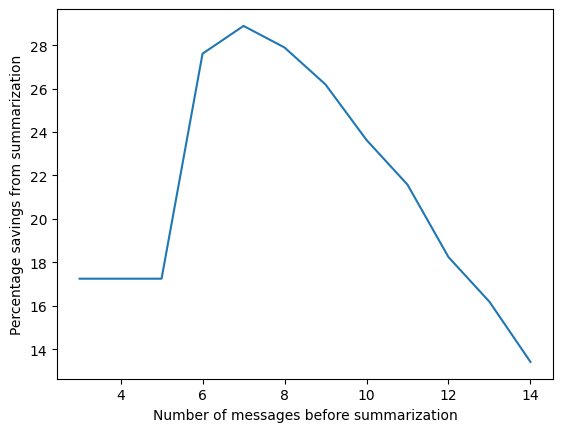

In [1]:
def simulate_message_generation_cost(summarize_on_n_messages, run_simulations):
    num_max_input_messages = 14
    average_message_length = 100
    min_messages_to_keep = 4
    desired_summarization_length = 200

    normal_tokens_spent = 0
    normal_current_num_messages = 0

    sum_tokens_spent = 0
    sum_current_num_messages = 0
    current_summarization_total = 0

    for i in range(run_simulations):
        normal_current_num_messages += 1
        sum_current_num_messages += 1

        # Checks if we should summarize and does that, adding summarization cost to tokens spent
        if sum_current_num_messages >= summarize_on_n_messages or sum_current_num_messages >= num_max_input_messages:
            num_to_summarize = sum_current_num_messages - min_messages_to_keep
            if num_to_summarize > 0:
                current_summarization_total = desired_summarization_length
                cost_of_summarization = (num_to_summarize * average_message_length) + current_summarization_total + desired_summarization_length
                sum_current_num_messages = min_messages_to_keep
                sum_tokens_spent += cost_of_summarization
                # print(f"Summarizing now, cost: {cost_of_summarization}. Num messages: {sum_current_num_messages}")

        # Add cost of message generation for the sum simulator
        sum_tokens_spent += (sum_current_num_messages * average_message_length) + current_summarization_total + average_message_length # Last is for the output size

        # Check if the number of normal messages is greater than or equal to the max number of messages and if so, set the normal_current_num_messages to it
        if normal_current_num_messages >= num_max_input_messages:
            normal_current_num_messages = num_max_input_messages

        # Add cost of message generation for the normal simulator
        normal_tokens_spent += (normal_current_num_messages * average_message_length) + average_message_length

    return normal_tokens_spent, sum_tokens_spent, (normal_tokens_spent - sum_tokens_spent) / normal_tokens_spent * 100

stats = {}
for i in range(3, 15):
    normal_tokens_spent, sum_tokens_spent, savings = simulate_message_generation_cost(summarize_on_n_messages=i, run_simulations=100)
    stats[i] = savings

    print("Summarize on {} messages".format(i))
    print("Tokens spent on normal message generation: {}".format(normal_tokens_spent))
    print("Tokens spent on summarization message generation: {}".format(sum_tokens_spent))
    print("Percentage savings from summarization: {}".format(savings))
    print("--------------------")

# Plot out the stats dictionary as a graph where the keys are the x axis and the values are the y axis
import matplotlib.pyplot as plt
plt.plot(list(stats.keys()), list(stats.values()))
plt.xlabel("Number of messages before summarization")
plt.ylabel("Percentage savings from summarization")
plt.show()
